**Sales Forecasting:**
You are provided with historical sales data for 45 retail stores located in
different regions. Each store contains a number of departments, and you are
tasked with predicting the department-wide sales for each store.

# **Data Processing and Cleaning**

In [171]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_log_error
warnings.filterwarnings("ignore") # ignoring warnings
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor


In [172]:
df_feat=pd.read_csv('features.csv')
df_store=pd.read_csv('stores.csv')
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

In [173]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [175]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [176]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [177]:
df_train1=df_train.merge(df_store,how='inner',on='Store').merge(df_feat,how='inner',on=['Store','Date','IsHoliday'])

In [178]:
df_train1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [179]:
df_test1=df_test.merge(df_store,how='inner',on='Store').merge(df_feat,how='inner',on=['Store','Date','IsHoliday'])

In [180]:
df_test1.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [181]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [182]:
df_train1.Date = pd.to_datetime(df_train1.Date)
df_test1.Date = pd.to_datetime(df_test1.Date)

In [183]:
storetype_values = {'A':3, 'B':2, 'C':1}
df_train1['Type'] = df_train1.Type.map(storetype_values)
df_test1['Type'] = df_test1.Type.map(storetype_values)

In [184]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [185]:
df_train1.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
Type            0.182242
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [186]:
df_train1['Year']=df_train1['Date'].dt.year
df_train1['Month']=df_train1['Date'].dt.month
df_train1['Week']=df_train1['Date'].dt.week
df_train1['Day']=df_train1['Date'].dt.day

df_test1['Year']=df_test1['Date'].dt.year
df_test1['Month']=df_test1['Date'].dt.month
df_test1['Week']=df_test1['Date'].dt.week
df_test1['Day']=df_test1['Date'].dt.day

In [187]:
df_train1 = df_train1[df_train1.Weekly_Sales >= 0]

WE CAN SEE THAT SALES WERE AT PEAKS DURING FESTIVE SEASON

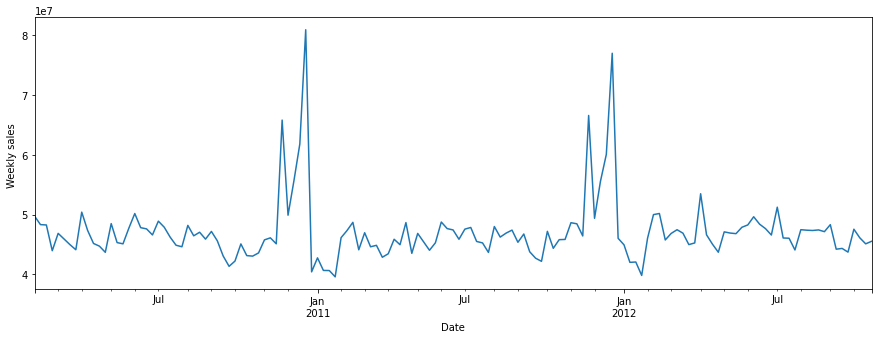

In [188]:
plt.figure(figsize=(15,5))
df_train1.groupby(['Date'])['Weekly_Sales'].sum().plot()
plt.ylabel('Weekly sales ');

In [189]:
df_test1.drop('Date',axis=1,inplace=True)
df_train1.drop('Date',axis=1,inplace=True)

In [190]:
df_train1.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270085
MarkDown2       309367
MarkDown3       283618
MarkDown4       285750
MarkDown5       269337
CPI                  0
Unemployment         0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [191]:
df_test1.isnull().sum()

Store               0
Dept                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Year                0
Month               0
Week                0
Day                 0
dtype: int64

In [192]:
df_test1.fillna(value=0,inplace=True)

In [193]:
df_train1.fillna(value=0,inplace=True)

In [194]:
df_train1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,420285.0,22.195477,12.787213,1.000,11.000000,22.000000,33.000000,45.000000
Dept,420285.0,44.242771,30.507197,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,420285.0,16030.329773,22728.500149,0.000,2117.560000,7659.090000,20268.380000,693099.360000
Type,420285.0,2.410483,0.666411,1.000,2.000000,3.000000,3.000000,3.000000
Size,420285.0,136749.569176,60992.688568,34875.000,93638.000000,140167.000000,202505.000000,219622.000000
Temperature,420285.0,60.090474,18.448260,-2.060,46.680000,62.090000,74.280000,100.140000
Fuel_Price,420285.0,3.360888,0.458523,2.472,2.933000,3.452000,3.738000,4.468000
MarkDown1,420285.0,2590.187246,6053.225499,0.000,0.000000,0.000000,2801.500000,88646.760000
MarkDown2,420285.0,878.803239,5076.525234,-265.760,0.000000,0.000000,2.400000,104519.540000
MarkDown3,420285.0,468.771234,5533.593113,-29.100,0.000000,0.000000,4.540000,141630.610000


THE OUTLIERS REPRESENT THE SALES DURING FESTIVE SEASON

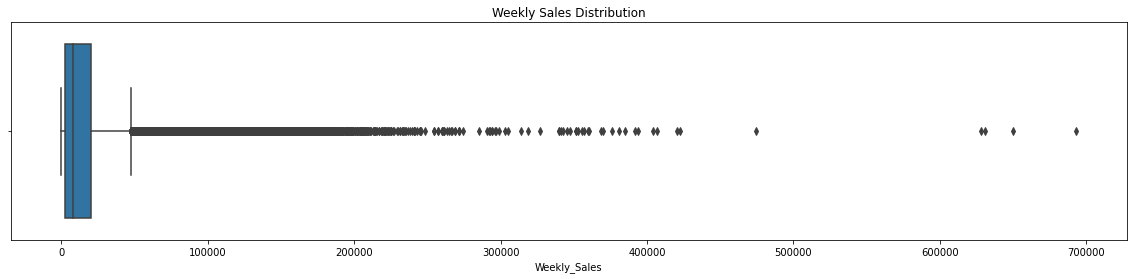

In [195]:
plt.figure(figsize=(20,4))
plt.title('Weekly Sales Distribution')
sns.boxplot(data=df_train1, x='Weekly_Sales')
plt.show()

In [196]:
df_train1.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.244089
Type            0.182222
Dept            0.148704
MarkDown5       0.050612
MarkDown1       0.047260
MarkDown3       0.038530
MarkDown4       0.037481
Month           0.028431
Week            0.027689
MarkDown2       0.020961
IsHoliday       0.012856
Fuel_Price      0.000092
Temperature    -0.002333
Day            -0.006266
Year           -0.010004
CPI            -0.021153
Unemployment   -0.025831
Store          -0.085099
Name: Weekly_Sales, dtype: float64

In [197]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Weekly_Sales  420285 non-null  float64
 3   IsHoliday     420285 non-null  bool   
 4   Type          420285 non-null  int64  
 5   Size          420285 non-null  int64  
 6   Temperature   420285 non-null  float64
 7   Fuel_Price    420285 non-null  float64
 8   MarkDown1     420285 non-null  float64
 9   MarkDown2     420285 non-null  float64
 10  MarkDown3     420285 non-null  float64
 11  MarkDown4     420285 non-null  float64
 12  MarkDown5     420285 non-null  float64
 13  CPI           420285 non-null  float64
 14  Unemployment  420285 non-null  float64
 15  Year          420285 non-null  int64  
 16  Month         420285 non-null  int64  
 17  Week          420285 non-null  int64  
 18  Day 

deletion of columns with less co relation

In [198]:
data=df_train1.drop(columns=['Weekly_Sales','CPI','Day','Unemployment','Fuel_Price','Temperature'])
X=data.values
y=df_train1['Weekly_Sales'].values

**SPLITTING**

In [199]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [200]:
X_train.shape,X_test.shape

((336228, 13), (84057, 13))

**MODELING**

In [201]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs

    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
                   
    return r2, rmse  # return all the metrics

In [202]:
dt = DecisionTreeRegressor()


In [203]:
result = pd.DataFrame(columns = ['r2_score','RMSE'])
for model, model_name in zip([dt], ['Decision tree']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)


In [204]:
result

,r2_score,RMSE
Decision tree,0.95741,4721.159378


**TEST DATA FOR PREDICTING**

In [205]:
data2=df_test1.drop(columns=['CPI','Day','Unemployment','Fuel_Price','Temperature'])
Test_X=data2


In [206]:
Test_X.head(2)

,Store,Dept,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week
0,1,1,False,3,151315,6766.44,5147.7,50.82,3639.9,2737.42,2012,11,44
1,1,2,False,3,151315,6766.44,5147.7,50.82,3639.9,2737.42,2012,11,44


In [207]:
pred = dt.predict(Test_X)


In [208]:
Store=data2.Store.values
Dept=data2.Dept.values

In [209]:
final={'Store':Store,'Department':Dept,'Weekly Sales':pred}


In [210]:
final=pd.DataFrame(data=final)
final.head()

,Store,Department,Weekly Sales
0,1,1,17417.37
1,1,2,47313.62
2,1,3,9959.64
3,1,4,36826.52
4,1,5,20920.03


In [211]:
final.to_csv('SalesForecastingresult.csv')